In [ ]:
using Pkg
cd("../")
Pkg.activate(".")
using Statistics
using LinearAlgebra
using Distributions
using Random
using PyPlot

In [2]:
rng = MersenneTwister(2492022)

MersenneTwister(2492022)

In [3]:
function compute_posterior_params(x::Array{Float64,1})
    N = length(x)
    θ_N = cumsum(x) ./ (1 .+ (1:N))
    σ_N = sqrt.(1 ./ (1 .+ (1:N)))
    return θ_N, σ_N
end

compute_posterior_params (generic function with 1 method)

In [4]:
function visualize_pdf(ax,q;X_plot = -2:0.01:4, ground_truth = false)
    Y_plot = pdf.(q, X_plot)
    if ground_truth
        ax.plot(X_plot,Y_plot,"--k")
    else
        ax.plot(X_plot,Y_plot)
    end
    ax.set_xlim([findmin(X_plot)[1],findmax(X_plot)[1]])
end

visualize_pdf (generic function with 1 method)

In [5]:
function visualize_pdf_plus_data(N,θ_N,σ_N,θ_star,q; Ns = [2,10,100,1000])
    fig = figure(figsize=(15,5))
    
    ax = subplot(1,2,1)
    ax.plot(1:N,θ_N,"k")
    ax.fill_between(1:N,θ_N .- σ_N, θ_N .+ σ_N, color="k", alpha = 0.3)
    ax.plot(1:N,ones(N) .* θ_star, "--k")
    ax.set_xlim(1,N)
    ax.set_xscale("log")
    ax.set_ylim(-2,4)
    for n = Ns
        ax.plot([1,1].*n,[-2,4])
    end
    legend(["mean of p(θ|x_{1:N})","std of p(θ|x_{1:N})"])
    ax.set_xlabel("N")
    ax.set_ylabel("θ")

    ax = subplot(1,2,2)
    for n = Ns
        visualize_pdf(ax,Normal(θ_N[n],1.))
    end
    visualize_pdf(ax,q; ground_truth = true)
    legend(string.(Ns))
    ax.set_xlabel("x")
    ax.set_ylabel("probability density")
    tight_layout()
end

visualize_pdf_plus_data (generic function with 1 method)

# Case 1: Gaussian distribution

In [6]:
θ_star = 1.
q_Gaussian = Normal(θ_star,1.)

Normal{Float64}(μ=1.0, σ=1.0)

In [7]:
N = 10000
X_samples = rand(rng,q_Gaussian,N);
θ_N, σ_N = compute_posterior_params(X_samples);

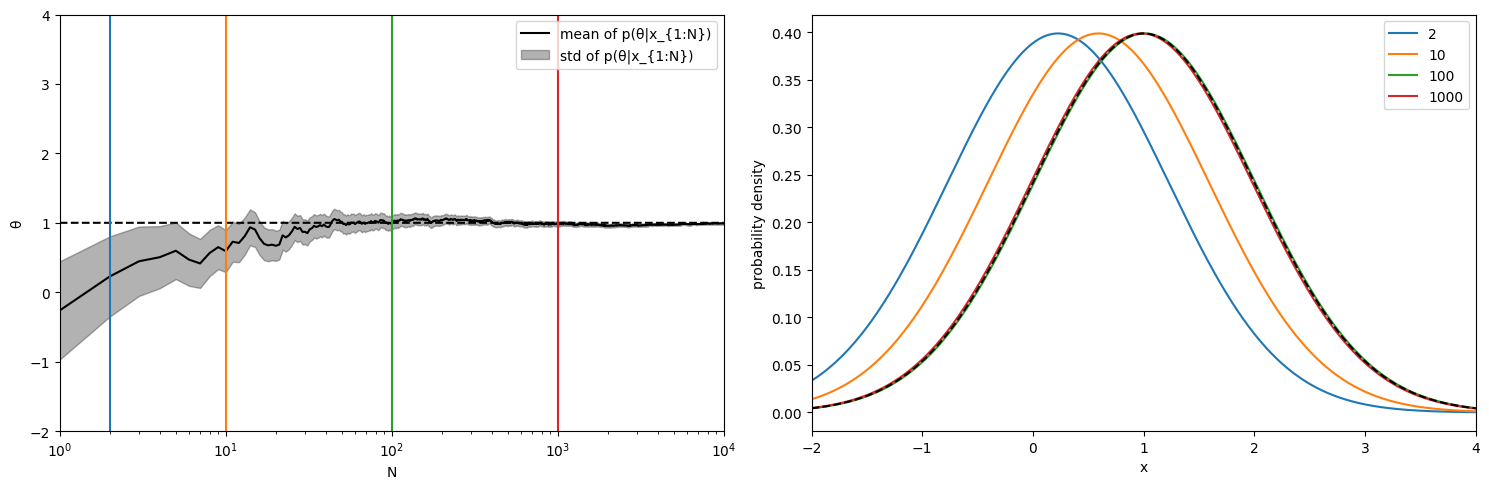

In [8]:
visualize_pdf_plus_data(N,θ_N,σ_N,θ_star,q_Gaussian)
savefig("Gaussian.png")

# Case 2: Laplace distribution

In [9]:
θ_star = 1.
q_Laplace = Laplace(θ_star, 1)

Laplace{Float64}(μ=1.0, θ=1.0)

In [10]:
X_samples = rand(rng,q_Laplace,N);
θ_N, σ_N = compute_posterior_params(X_samples);

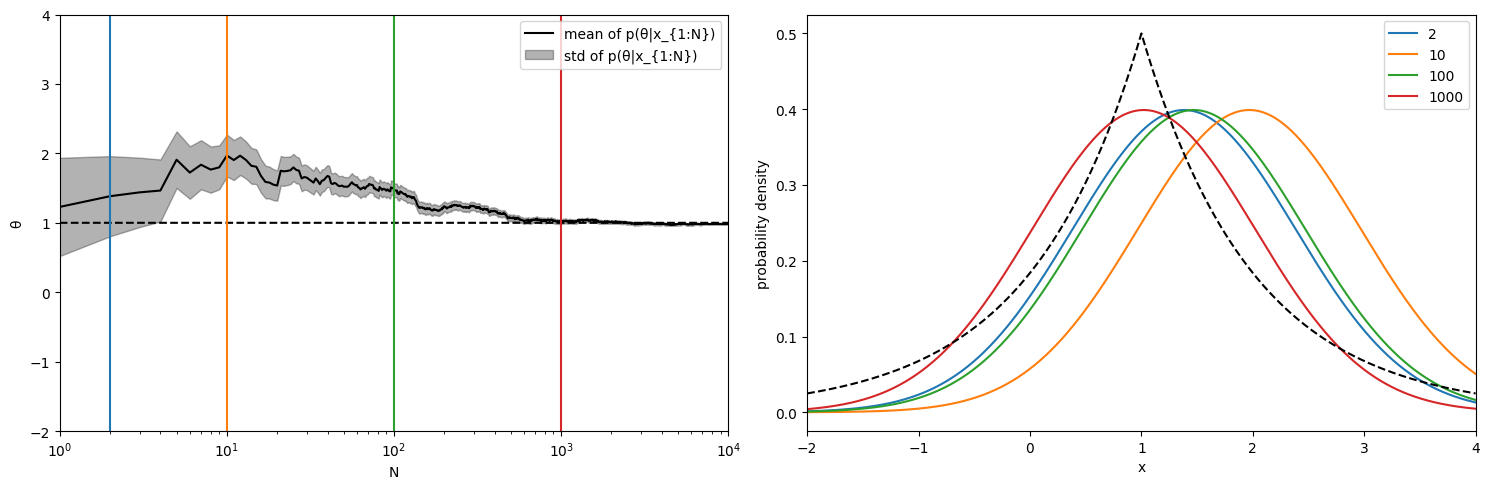

In [11]:
visualize_pdf_plus_data(N,θ_N,σ_N,θ_star,q_Laplace)
savefig("Laplace.png")

# Case 3: Cauchy distribution

In [12]:
θ_star = 1.
q_Cauchy = Cauchy(θ_star, 1.)

Cauchy{Float64}(μ=1.0, σ=1.0)

In [13]:
X_samples = rand(rng,q_Cauchy,N);
θ_N, σ_N = compute_posterior_params(X_samples);

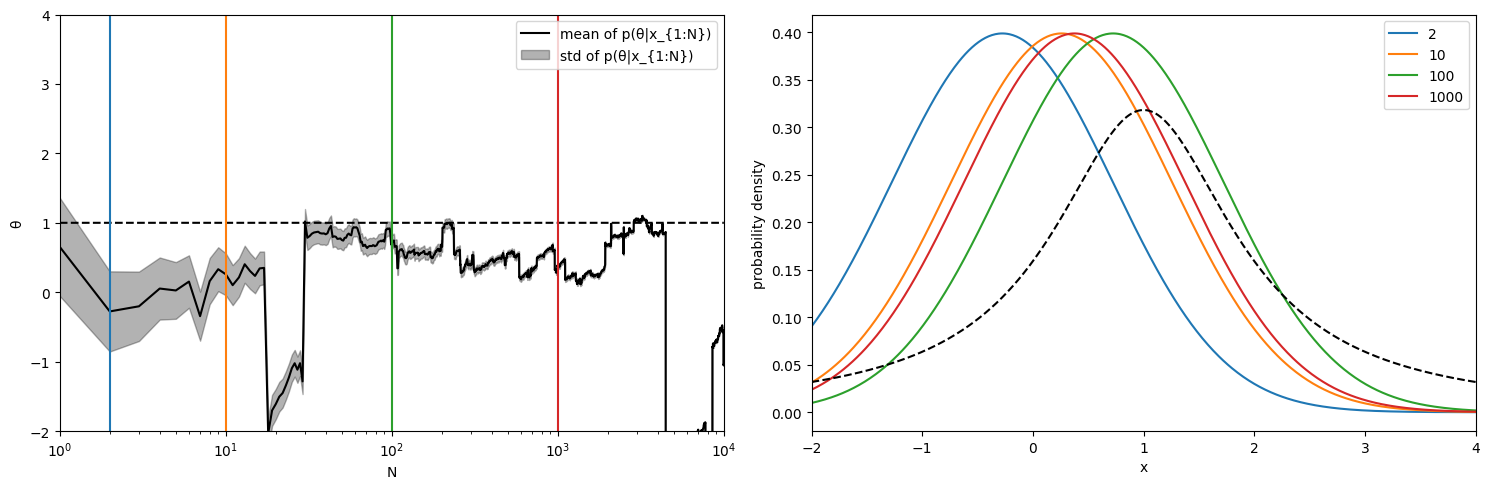

In [14]:
visualize_pdf_plus_data(N,θ_N,σ_N,θ_star,q_Cauchy)
savefig("Cauchy.png")